# Exploración de archivos

In [1]:
import sys
sys.path.insert(0, '..')
from utils.cargar import df_caso

In [2]:
caso = 'laura'
df = df_caso(caso)
df.head()

,user_id,team_id,gender,df,title,opt_left,opt_right,max_num,sel,comment,phase,time,curso
id,,,,,,,,,,,,,
4543,1575,NaN,M,1,Es adecuado que Laura le dedique paulatinament...,Ajustar dedicación,Mantener dedicación,6,4,NaN,1,2020-09-26T16:09:57.110Z,2020.CD2201
4544,1551,NaN,M,1,Es adecuado que Laura le dedique paulatinament...,Ajustar dedicación,Mantener dedicación,6,2,NaN,1,2020-09-26T16:10:29.083Z,2020.CD2201
4545,1560,NaN,M,1,Es adecuado que Laura le dedique paulatinament...,Ajustar dedicación,Mantener dedicación,6,4,NaN,1,2020-09-26T16:10:37.523Z,2020.CD2201
4548,1570,NaN,F,1,Es adecuado que Laura le dedique paulatinament...,Ajustar dedicación,Mantener dedicación,6,4,NaN,1,2020-09-26T16:10:53.108Z,2020.CD2201
4550,1495,NaN,F,1,Es adecuado que Laura le dedique paulatinament...,Ajustar dedicación,Mantener dedicación,6,2,NaN,1,2020-09-26T16:10:54.550Z,2020.CD2201


In [3]:
print(df['title'].unique()[0])
print('1\t'+df['opt_left'].unique()[0])
print(str(df['max_num'].unique()[0])+'\t'+df['opt_right'].unique()[0])

Es adecuado que Laura le dedique paulatinamente más tiempo al trabajo y su desarrollo profesional que a la familia y las otras dimensiones de su vida.
1	Ajustar dedicación
6	Mantener dedicación


In [4]:
print('Cantidad de valores nulos por columna:')
display(df.isna().sum())
print('\nCantidad de valores únicos por columna:')
display(df.nunique())

Cantidad de valores nulos por columna:


user_id         0
team_id      2104
gender          0
df              0
title           0
opt_left        0
opt_right       0
max_num         0
sel             0
comment       549
phase           0
time            0
dtype: int64


Cantidad de valores únicos por columna:


user_id       602
team_id       335
gender          3
df              4
title          14
opt_left       10
opt_right      10
max_num         3
sel             7
comment      3566
phase           5
time         4978
dtype: int64

In [5]:
df = df[df['comment'].notna()]
print("Cantidad de respuestas con texto: {}".format(len(df)))

Cantidad de respuestas con texto: 4429


## Exploración básica del texto

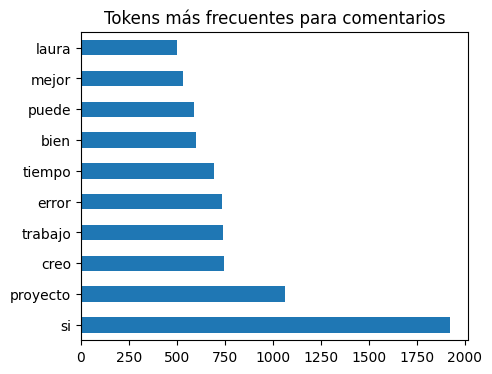

In [6]:
from utils.exploracion import plot_token_frequency, most_common
from nltk.corpus import stopwords

serie_tokens = most_common(df,'comment',ignore=stopwords.words('spanish'))
plot_token_frequency(serie_tokens,'Tokens más frecuentes para comentarios')

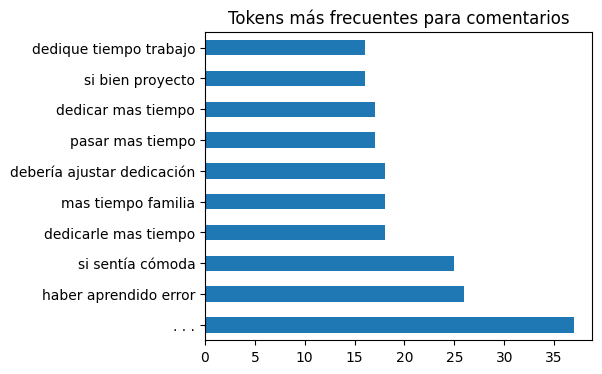

In [7]:
serie_tokens3 = most_common(df,'comment',ignore=stopwords.words('spanish'),n_grams=3)
plot_token_frequency(serie_tokens3,'Tokens más frecuentes para comentarios')

---

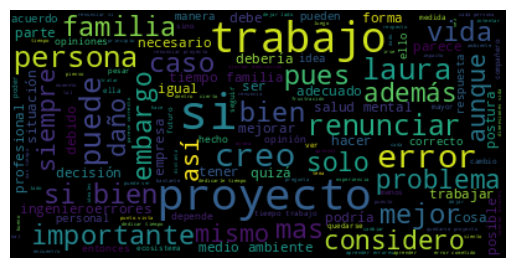

In [8]:
from utils.exploracion import wordcloud_from_column

wordcloud_from_column(df,'comment',ignore=stopwords.words('spanish'))

## Análisis exploratorio

---

In [9]:
from utils.preprocesamiento import delete_non_string_rows

df = delete_non_string_rows(df,'comment')

0 rows found with non string elements for column comment


In [10]:
from utils.exploracion import comment_length

lengths = comment_length(df,'comment')
lengths_nsw = comment_length(df,'comment',ignore=stopwords.words('spanish'))

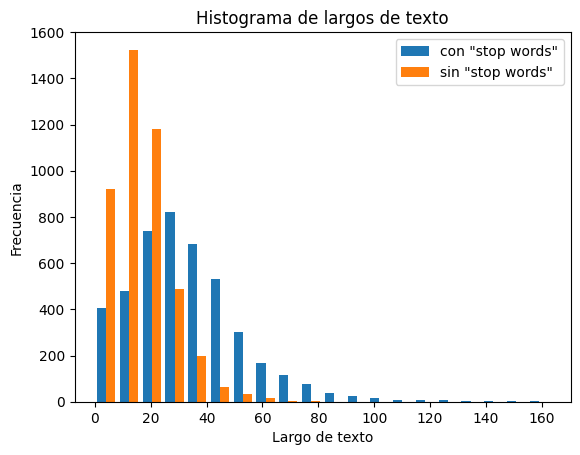

In [11]:
import matplotlib.pyplot as plt

plt.hist([lengths, lengths_nsw], bins=20, color=['tab:blue', 'tab:orange'], label=['con "stop words"', 'sin "stop words"'])

plt.xlabel('Largo de texto')
plt.ylabel('Frecuencia')
plt.title('Histograma de largos de texto')
plt.legend()
plt.show()

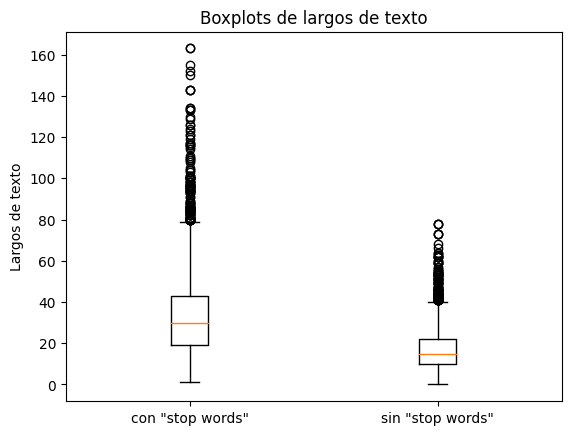

In [12]:
fig, ax = plt.subplots()
ax.boxplot([lengths, lengths_nsw])
ax.set_ylabel('Largos de texto')
ax.set_xticklabels(['con "stop words"', 'sin "stop words"'])
ax.set_title('Boxplots de largos de texto')
plt.show()

In [13]:
from utils.exploracion import basic_stats, print_basic_stats

In [14]:
print('Con "stop words"')
print_basic_stats(lengths)
print('\nSin "stop words"')
print_basic_stats(lengths_nsw)

Con "stop words"
Media: 33.042447505080155
Desviación estándar: 20.79379792226148
Mediana: 30.0
Mínimo: 1
Máximo: 163

Sin "stop words"
Media: 16.65861368254685
Desviación estándar: 10.28094647587618
Mediana: 15.0
Mínimo: 0
Máximo: 78


---

Condicionamiento por valor seleccionado

In [15]:
df['sel'].value_counts()

2    1039
1     704
3     689
6     681
5     668
4     578
7      70
Name: sel, dtype: int64

Se observan valores fuera de rango, por el momento se eliminarán estos valores

In [16]:
df = df.drop(df[df['sel'] > 6].index)

In [17]:
toks_1 = most_common(df[df['sel'] == 1],'comment',ignore=stopwords.words('spanish')+['si', caso])
toks_2 = most_common(df[df['sel'] == 2],'comment',ignore=stopwords.words('spanish')+['si', caso])
toks_3 = most_common(df[df['sel'] == 3],'comment',ignore=stopwords.words('spanish')+['si', caso])
toks_4 = most_common(df[df['sel'] == 4],'comment',ignore=stopwords.words('spanish')+['si', caso])
toks_5 = most_common(df[df['sel'] == 5],'comment',ignore=stopwords.words('spanish')+['si', caso])
toks_6 = most_common(df[df['sel'] == 6],'comment',ignore=stopwords.words('spanish')+['si', caso])

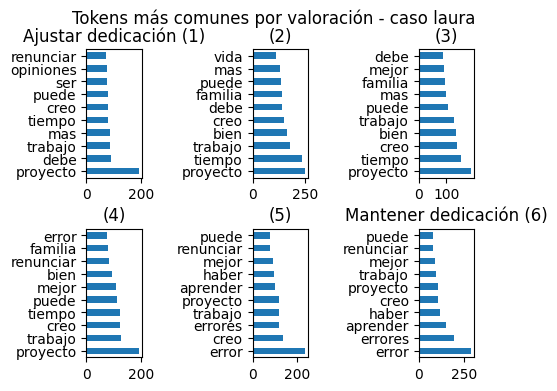

In [18]:
fig, axs = plt.subplots(2, 3)
plt.subplots_adjust(wspace=2, hspace=0.4)

plot_token_frequency(toks_1,'Ajustar dedicación (1)',ax=axs[0,0])
plot_token_frequency(toks_2,'(2)',ax=axs[0,1])
plot_token_frequency(toks_3,'(3)',ax=axs[0,2])
plot_token_frequency(toks_4,'(4)',ax=axs[1,0])
plot_token_frequency(toks_5,'(5)',ax=axs[1,1])
plot_token_frequency(toks_6,'Mantener dedicación (6)',ax=axs[1,2])
fig.suptitle("Tokens más comunes por valoración - caso {}".format(caso));

In [19]:
lengths_1 = comment_length(df[df['sel'] == 1],'comment',ignore=stopwords.words('spanish'))
lengths_2 = comment_length(df[df['sel'] == 2],'comment',ignore=stopwords.words('spanish'))
lengths_3 = comment_length(df[df['sel'] == 3],'comment',ignore=stopwords.words('spanish'))
lengths_4 = comment_length(df[df['sel'] == 4],'comment',ignore=stopwords.words('spanish'))
lengths_5 = comment_length(df[df['sel'] == 5],'comment',ignore=stopwords.words('spanish'))
lengths_6 = comment_length(df[df['sel'] == 6],'comment',ignore=stopwords.words('spanish'))

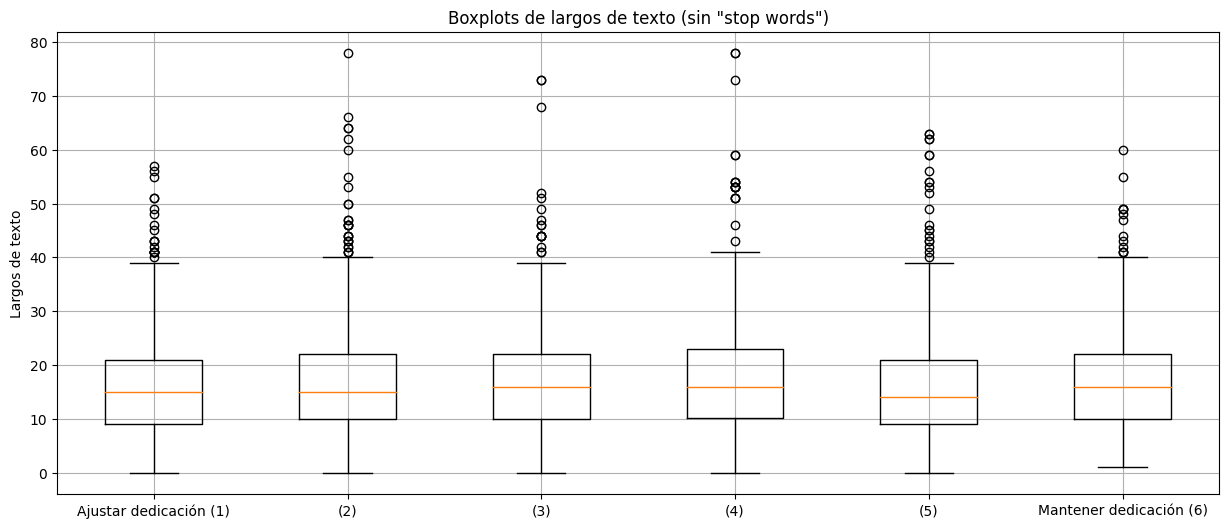

In [20]:
plt.rcParams["figure.figsize"] = (15,6)
fig, ax = plt.subplots()
ax.boxplot([lengths_1, lengths_2, lengths_3, lengths_4, lengths_5, lengths_6])
ax.set_ylabel('Largos de texto')
ax.set_xticklabels(['Ajustar dedicación (1)', '(2)', '(3)', '(4)', '(5)', 'Mantener dedicación (6)'])
ax.set_title('Boxplots de largos de texto (sin "stop words")')
plt.grid()
plt.show()

In [21]:
from utils.exploracion import print_table_md

dic = basic_stats(lengths_1)

# headers = ['valoración'] + list(dic.keys())
headers = ['valoración', 'media', 'mediana', 'desviación estándar', 'mínimo', 'máximo']
data = [['(1)'] + list(dic.values())]
data.append(['(2)'] + list(basic_stats(lengths_2).values()))
data.append(['(3)'] + list(basic_stats(lengths_3).values()))
data.append(['(4)'] + list(basic_stats(lengths_4).values()))
data.append(['(5)'] + list(basic_stats(lengths_5).values()))
data.append(['(6)'] + list(basic_stats(lengths_6).values()))

print_table_md(headers, data)

| valoración | media | mediana | desviación estándar | mínimo | máximo |
| --- | --- | --- | --- | --- | --- |
| (1) | 16.0625 | 15.0 | 9.558971422652697 | 0 | 57 |
| (2) | 16.421559191530317 | 15.0 | 10.188755482449515 | 0 | 78 |
| (3) | 16.809869375907112 | 16.0 | 10.464543278169058 | 0 | 73 |
| (4) | 17.82179930795848 | 16.0 | 11.35740885338011 | 0 | 78 |
| (5) | 16.028443113772454 | 14.0 | 10.590390767956649 | 0 | 63 |
| (6) | 16.87518355359765 | 16.0 | 9.521163581734921 | 1 | 60 |


---

### Condicionamiento por fases

In [22]:
df['phase'].value_counts()

1    1498
3    1278
2    1015
4     489
5      79
Name: phase, dtype: int64